In [ ]:
# Tratamento dos dados
import numpy as np
import pandas as pd

# Modelos de Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Métricas de avaliação
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, ConfusionMatrixDisplay, RocCurveDisplay, confusion_matrix, classification_report

# Plot dos gráficos
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns

# Recebendo os dados:
from google_drive_downloader import GoogleDriveDownloader as gdd

In [ ]:
# Recebendo os dados:
data_google_id = '1AW9vSWvLzlLzP-v-SvJ-AHV0hMdmxhva'

gdd.download_file_from_google_drive(file_id=data_google_id,
                                    dest_path = './dados.csv', # Faz o download dos dados e salva o mesmo num arquivo nomeado data.csv
                                    showsize = True)

# Armazenandos os dados em um DataFrame
# para receber os dados o sep teve como argumento o valor ','. Isso ocorreu devido a
dados = pd.read_csv("dados.csv", sep = ',')

In [ ]:
dados.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [ ]:
dados.isnull().sum()

,0
GENDER,0
AGE,0
SMOKING,0
YELLOW_FINGERS,0
ANXIETY,0
PEER_PRESSURE,0
CHRONIC DISEASE,0
FATIGUE,0
ALLERGY,0
WHEEZING,0


In [ ]:
dados.shape

(309, 16)

In [ ]:
colunas = dados.columns
for col in colunas:
  print('='*60)
  print(col)
  print(dados[col].unique())
  print('='*60)

GENDER
['M' 'F']
AGE
[69 74 59 63 75 52 51 68 53 61 72 60 58 48 57 44 64 21 65 55 62 56 67 77
 70 54 49 73 47 71 66 76 78 81 79 38 39 87 46]
SMOKING
[1 2]
YELLOW_FINGERS
[2 1]
ANXIETY
[2 1]
PEER_PRESSURE
[1 2]
CHRONIC DISEASE
[1 2]
FATIGUE 
[2 1]
ALLERGY 
[1 2]
WHEEZING
[2 1]
ALCOHOL CONSUMING
[2 1]
COUGHING
[2 1]
SHORTNESS OF BREATH
[2 1]
SWALLOWING DIFFICULTY
[2 1]
CHEST PAIN
[2 1]
LUNG_CANCER
['YES' 'NO']


In [ ]:
conversao = {"M" : 1, 'F' : 0}
dados['GENDER'].replace(conversao, inplace=True)

In [ ]:
dados['GENDER'].unique()

array([1, 0])

In [ ]:
dados.describe()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,0.524272,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,0.500221,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,0.000000,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,1.000000,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,1.000000,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [ ]:
conversao2 = {1 : "YES" ,0 :  'NO'}
dados['LUNG_CANCER'].replace(conversao2, inplace=True)

In [ ]:
dados.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [ ]:
# Separando os dados de entrada e de saída
X = dados.drop(columns=['LUNG_CANCER'])
y = dados["LUNG_CANCER"] #Rótulos/Labels

# Dividindo os dados no conjunto de teste e treinamento
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [ ]:
modelos_treino = {'Gaussiano' : GaussianNB(),
                  'LDA' : LinearDiscriminantAnalysis(),
                  'QDA' : QuadraticDiscriminantAnalysis(),
                  'SVM' : SVC(kernel='rbf')}

In [ ]:
dicionario_previsoes = {}

for nome_modelo, modelo in modelos_treino.items():
  clf = modelo
  clf.fit(X_train, y_train)
  dicionario_previsoes[nome_modelo] = clf.predict(X_test)

In [ ]:
dicionario_previsoes

{'Gaussiano': array(['YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
        'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'NO',
        'YES', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
        'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
        'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
        'YES', 'YES', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'YES',
        'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES'],
       dtype='<U3'),
 'LDA': array(['YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
        'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
        'YES', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
        'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
        'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
        'YES', 'YES', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'YES',
        'YES', 'YES', 'YES', 'YES', 'YES', 'YES

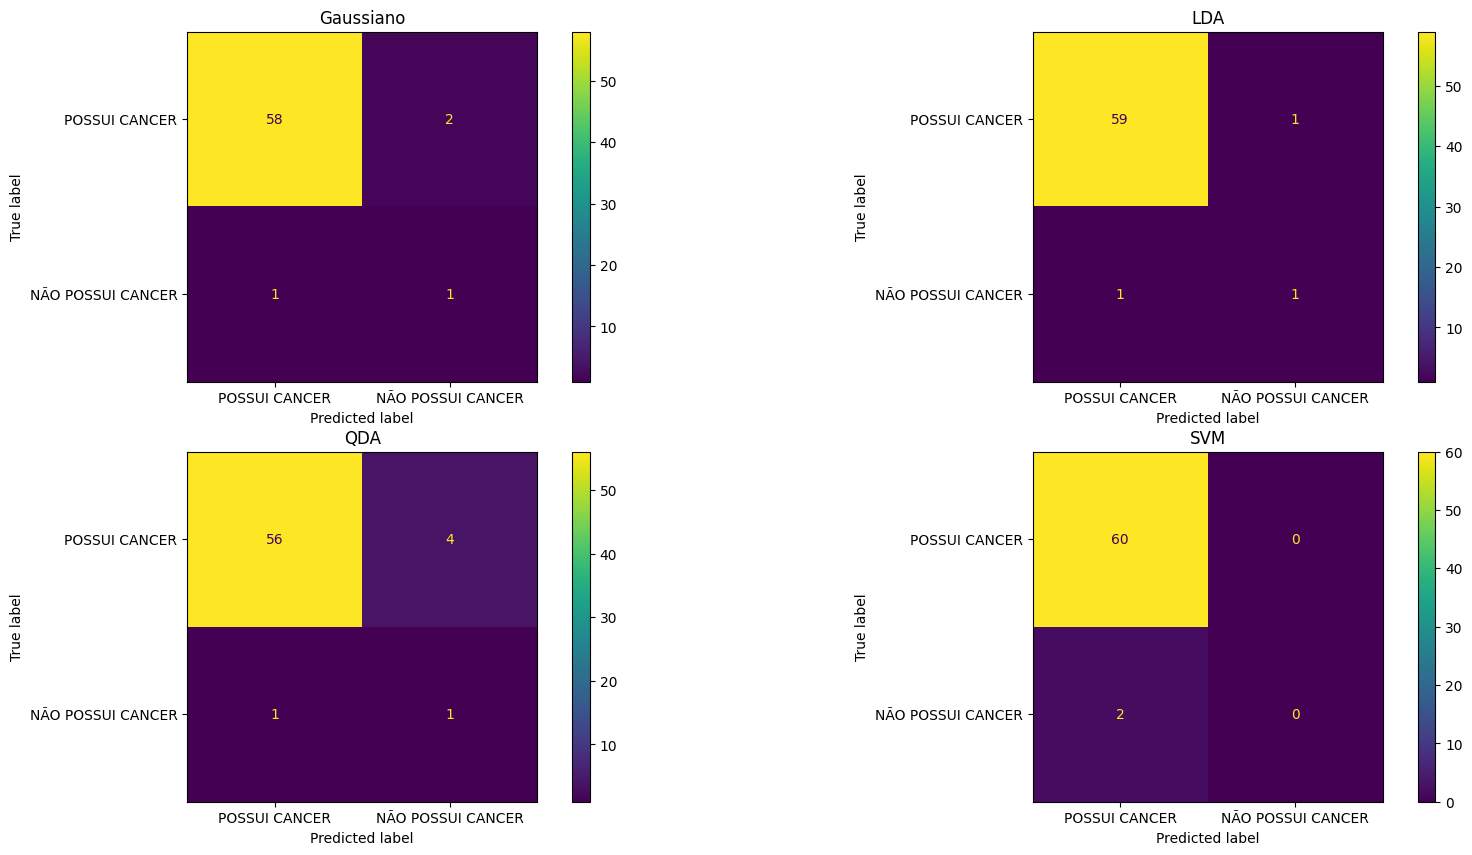

In [ ]:
figure =plt.figure(figsize=(20,10))
for indice, (nome_modelo, y_pred) in enumerate(dicionario_previsoes.items()):
  cm = confusion_matrix(y_true = y_test, y_pred = y_pred, labels = dados["LUNG_CANCER"].unique())
  disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['POSSUI CANCER', 'NÃO POSSUI CANCER'])
  pos = plt.subplot(2,2, indice + 1)
  disp.plot(ax = pos)
  pos.set_title(nome_modelo)

In [ ]:
for nome_modelo, y_pred in dicionario_previsoes.items():
  print('='*50)
  print(nome_modelo)
  print(classification_report(y_true = y_test, y_pred = y_pred))

Gaussiano
              precision    recall  f1-score   support

          NO       0.33      0.50      0.40         2
         YES       0.98      0.97      0.97        60

    accuracy                           0.95        62
   macro avg       0.66      0.73      0.69        62
weighted avg       0.96      0.95      0.96        62

LDA
              precision    recall  f1-score   support

          NO       0.50      0.50      0.50         2
         YES       0.98      0.98      0.98        60

    accuracy                           0.97        62
   macro avg       0.74      0.74      0.74        62
weighted avg       0.97      0.97      0.97        62

QDA
              precision    recall  f1-score   support

          NO       0.20      0.50      0.29         2
         YES       0.98      0.93      0.96        60

    accuracy                           0.92        62
   macro avg       0.59      0.72      0.62        62
weighted avg       0.96      0.92      0.94        62

S

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
